*This is a piece of code to convert our Excel spreadsheets into the 80 column MPC format required for find_orb.*

Import modules

In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import functions

Object and observatory details

In [12]:
object = '1991 AQ'
obs_code = 995

Reads Excel file into relevantly named txt file in correct find_orb format and returns the pandas dataframe produced in the process

In [13]:
df = functions.read_from_excel(f'{object}', 995)
df

,Date + Time,Exp time,RA,RA in Degrees,RMS_X,FWHM_x (as),object counts,mean count,background pp,Readout Noise pp,...,RMS_Y,FWHM_y,SNR.1,sigma_AST.1,Dec err (as),Saturated?,Telescope,Observatory,Unnamed: 23,Unnamed: 24
0,2024-01-13T19:51:33.2181,90.0,05:24:13.242,81.055175,0.114,1.82,5830.8,43.577,3476.2,18.0,...,0.121,1.70,8.130432,0.088786,0.150080,N,East-16,995.0,NaN,NaN
1,2024-01-14T21:18:06.0402,90.0,05:19:12.118,79.800492,0.124,3.41,8485.6,136.310,2510.7,18.0,...,0.132,2.53,19.731181,0.054447,0.142788,N,East-16,995.0,NaN,NaN
2,2024-01-15T19:00:19.4148,90.0,05:14:53.132,78.721383,0.132,6.50,5854.7,136.870,3668.8,18.0,...,0.121,5.77,13.929925,0.175888,0.213489,N,East-16,995.0,NaN,NaN
3,2024-01-18T18:13:11.6411,90.0,05:00:27.666,75.115275,0.129,3.00,5887.4,37.671,4765.8,18.0,...,0.109,2.00,6.576786,0.129129,0.168983,N,East-16,995.0,NaN,FWHM are estimates as object was too faint for...
4,2024-01-24T19:57:10.129,90.0,04:30:27.117,67.612988,0.187,4.00,3719.1,26.400,7153.6,8.0,...,0.149,2.03,3.681558,0.234139,0.277528,N,Draco2,995.0,NaN,FWHM are estimates as object was too faint for...
5,2024-01-30T20:38:56,90.0,04:01:11.196,60.296650,0.156,4.42,5945.9,118.900,3019.3,18.0,...,0.088,2.62,14.289718,0.077855,0.117496,N,East 16,995.0,NaN,NaN
6,NaN,NaN,NaN,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,NaN,NaN,NaN,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,NaN,NaN,NaN,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,NaN,NaN,NaN,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [14]:
df['RA err (as)']

0     0.148429
1     0.144088
2     0.238083
3     0.232720
4     0.497815
5     0.203929
6          NaN
7          NaN
8          NaN
9          NaN
10         NaN
11         NaN
12         NaN
13         NaN
14         NaN
15         NaN
16         NaN
17         NaN
18         NaN
19         NaN
20         NaN
21         NaN
22         NaN
23         NaN
24         NaN
Name: RA err (as), dtype: float64

Plotting Dec vs RA for the given object

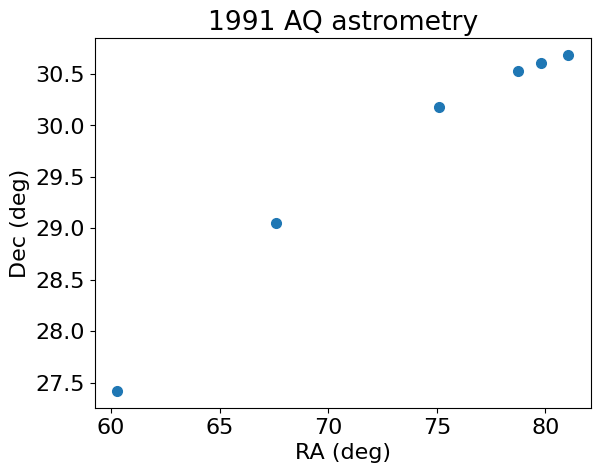

In [15]:
#setting some parameters for the plots.
plt.rcParams.update({'font.size': 16, 'lines.markersize': 7})

observatories = []
RA_err_deg = []
RA_deg = []
for i in range(0, len(df['RA'])):
    RA = str(df['RA'][i])
    RA_err = df['RA err (as)'][i]
    if RA != 'nan':
        RA_deg.append(functions.RA_to_deg(RA))
        RA_err_deg.append(float(RA_err)*15/3600)
        try:
            observatories.append(df['Observatory'][i])
        except:
            observatories.append(995)

Dec_err_deg = []
Dec_deg = []
for i in range(0, len(df['Dec'])):
    Dec = str(df['Dec'][i])
    Dec_err = df['Dec err (as)'][i]
    if Dec != 'nan':
        Dec_deg.append(functions.dec_to_deg(Dec))
        Dec_err_deg.append(float(Dec_err)/3600)

plt.errorbar(RA_deg, Dec_deg, xerr = RA_err_deg, yerr = Dec_err_deg, marker = 'o', capsize=3, linestyle = 'None')
plt.xlabel('RA (deg)')
plt.ylabel('Dec (deg)')
plt.title(f'{object} astrometry')
plt.savefig(f'plots/{object}_astrometry', bbox_inches='tight')
plt.show()
plt.close()